# Assignment 1

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

### Load your image

1. Display it in RGB

2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )

3. Use the cvtColor function to do the same and compare results

3. Print the array shapes of both the RGB and grayscale images

4. Print a few pixel values of both

( Do you notice the difference that number of channels created on the array shape ?? )

In [1]:
from google.colab import files
uploaded = files.upload()

Saving download.jpg to download.jpg


RGB shape: (194, 259, 3)


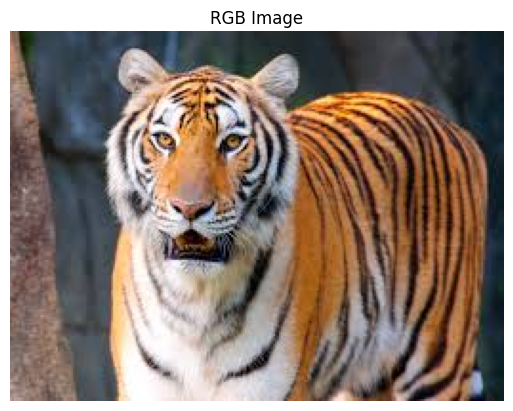

In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("download.jpg")     # loads in BGR
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title("RGB Image")
plt.axis("off")

print("RGB shape:", img_rgb.shape)

Manual grayscale shape: (194, 259)


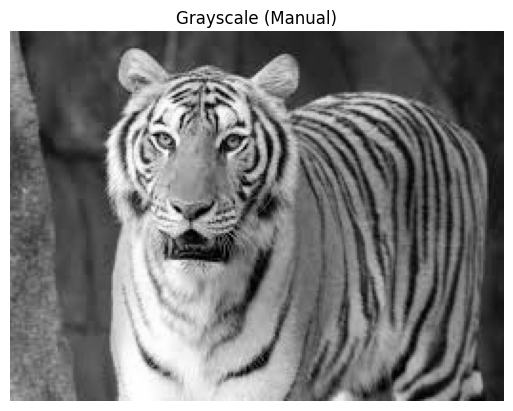

In [8]:
gray_manual = (0.299*img_rgb[:,:,0] +
               0.587*img_rgb[:,:,1] +
               0.114*img_rgb[:,:,2]).astype("uint8")

plt.imshow(gray_manual, cmap="gray")
plt.title("Grayscale (Manual)")
plt.axis("off")

print("Manual grayscale shape:", gray_manual.shape)

OpenCV grayscale shape: (194, 259)


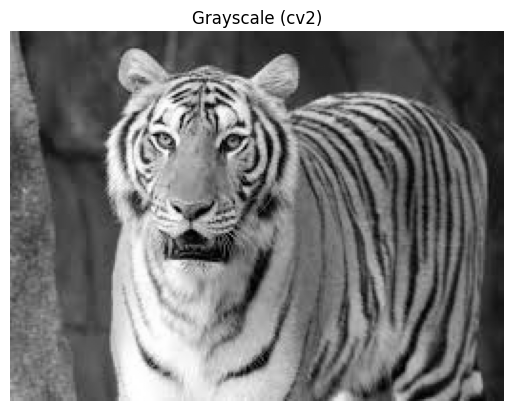

In [9]:
gray_cv = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_cv, cmap="gray")
plt.title("Grayscale (cv2)")
plt.axis("off")

print("OpenCV grayscale shape:", gray_cv.shape)

Are both grayscale images equal?: False


(np.float64(-0.5), np.float64(258.5), np.float64(193.5), np.float64(-0.5))

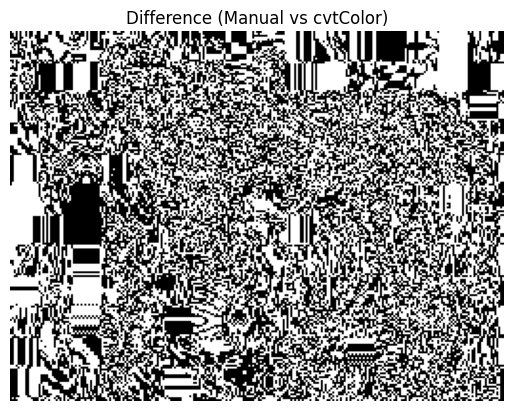

In [11]:
difference = cv2.absdiff(gray_manual, gray_cv)

print("Are both grayscale images equal?:", np.array_equal(gray_manual, gray_cv))
plt.imshow(difference, cmap='gray')
plt.title("Difference (Manual vs cvtColor)")
plt.axis("off")

In [10]:
print("\nFirst 5 RGB pixels:", img_rgb[0, :5])
print("First 5 Manual Gray pixels:", gray_manual[0, :5])
print("First 5 cv2 Gray pixels:", gray_cv[0, :5])


First 5 RGB pixels: [[154 117  99]
 [126  93  76]
 [127  98  82]
 [129 108  91]
 [ 90  78  62]]
First 5 Manual Gray pixels: [126 100 104 112  79]
First 5 cv2 Gray pixels: [126 101 105 112  80]


## Part B
### B1. Compute the FFT of the grayscale image ( use NumPy )
Steps:
1. <code>np.fft.fft2</code>
2. <code>np.fft.fftshift</code>
3. Store as <code>fshift</code>

### B2. Compute magnitude, phase and display Magnitude Spectrum

In [12]:
import numpy as np
import matplotlib.pyplot as plt
gray = gray_manual
f = np.fft.fft2(gray)
fshift = np.fft.fftshift(f)

print("FFT shape:", fshift.shape)

FFT shape: (194, 259)


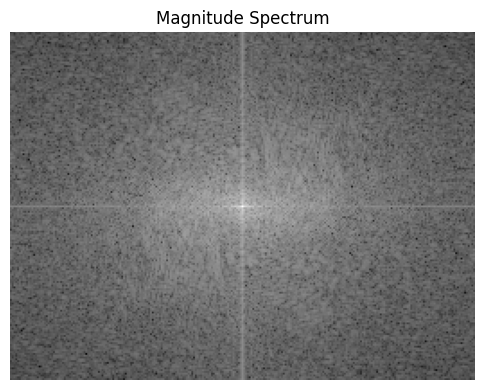

In [13]:
magnitude = np.abs(fshift)
magnitude_spectrum = np.log(magnitude + 1e-8)
phase = np.angle(fshift)

plt.figure(figsize=(6,6))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Magnitude Spectrum")
plt.axis("off")
plt.show()

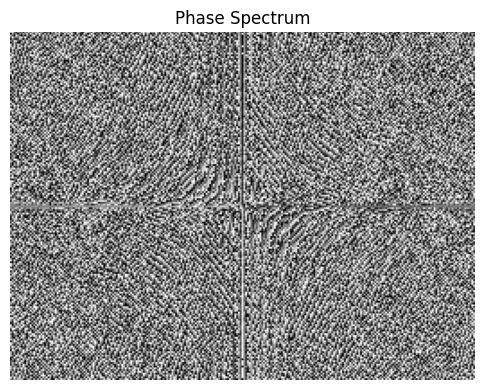

In [14]:
plt.figure(figsize=(6,6))
plt.imshow(phase, cmap='gray')
plt.title("Phase Spectrum")
plt.axis("off")
plt.show()

## Part C
### C1. Create 3 LPF masks

Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

For each:

1. Create a mask

2. Apply to <code>fshift</code>

3. Reconstruct using <code>ifftshift + ifft2</code>

4. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

### C2. Create HPF mask

1. Apply

2. Reconstruct

### C3. Create a square LPF mask
Keep side of square as 50. The square will be at the center of the filter.
Apply, Recontruct and show the output.

In [16]:
rows, cols = gray.shape
crow, ccol = rows // 2, cols // 2

def create_lpf_mask(radius):
    """Creates a circular Low Pass Filter mask of given radius."""
    mask = np.zeros((rows, cols), np.uint8)
    Y, X = np.ogrid[:rows, :cols]
    distance = (X - ccol)**2 + (Y - crow)**2
    mask[distance <= radius*radius] = 1
    return mask


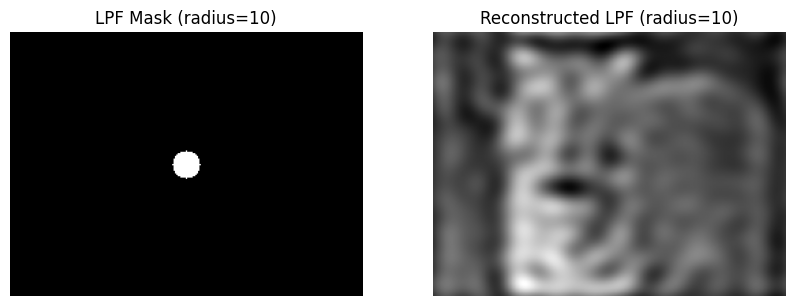

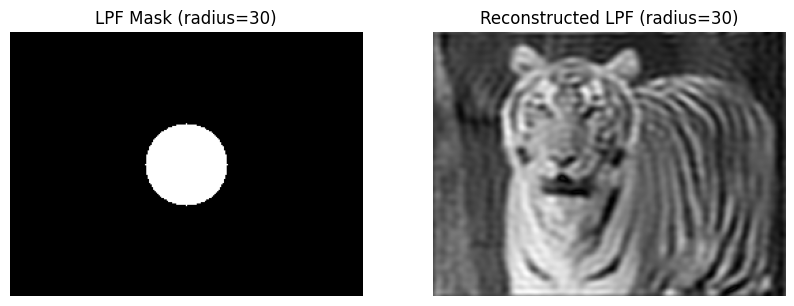

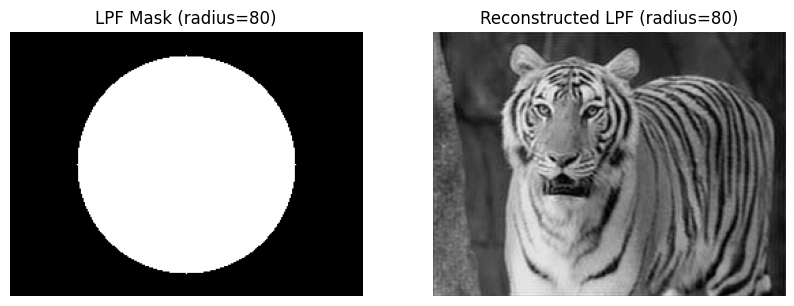

In [19]:
radii = [10, 30, 80]

outputs_lpf = []

for r in radii:
    mask = create_lpf_mask(r)
    fshift_lpf = fshift * mask
    f_ishift = np.fft.ifftshift(fshift_lpf)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)

    outputs_lpf.append((r, img_back, mask))

    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.imshow(mask, cmap='gray')
    plt.title(f"LPF Mask (radius={r})")
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(img_back, cmap='gray')
    plt.title(f"Reconstructed LPF (radius={r})")
    plt.axis('off')

    plt.show()

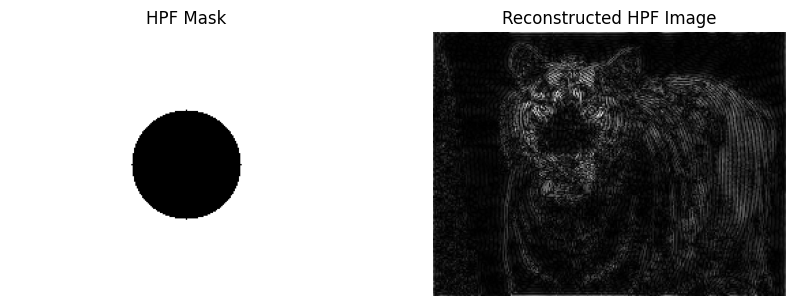

In [20]:
radius_hpf = 40
lpf = create_lpf_mask(radius_hpf)
hpf = 1 - lpf

fshift_hpf = fshift * hpf

f_ishift_hpf = np.fft.ifftshift(fshift_hpf)
img_hpf = np.abs(np.fft.ifft2(f_ishift_hpf))

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(hpf, cmap='gray')
plt.title("HPF Mask")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img_hpf, cmap='gray')
plt.title("Reconstructed HPF Image")
plt.axis("off")

plt.show()

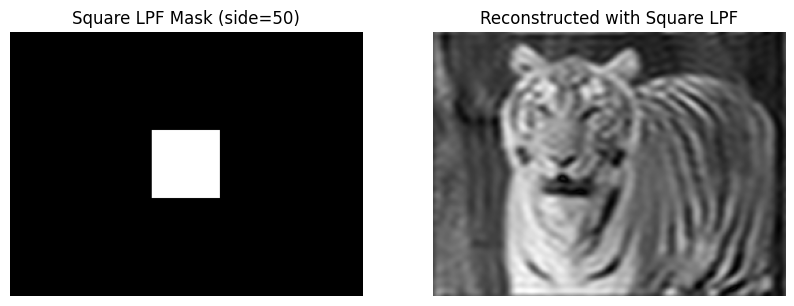

In [21]:
side = 50
square_lpf = np.zeros((rows, cols), np.uint8)

half = side // 2
square_lpf[crow-half:crow+half, ccol-half:ccol+half] = 1

fshift_square = fshift * square_lpf

f_ishift_sq = np.fft.ifftshift(fshift_square)
img_square = np.abs(np.fft.ifft2(f_ishift_sq))
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(square_lpf, cmap='gray')
plt.title("Square LPF Mask (side=50)")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img_square, cmap='gray')
plt.title("Reconstructed with Square LPF")
plt.axis("off")

plt.show()

## Part D

###D1. Phase-only reconstruction

Use: <code>phase_only = fshift / np.abs(fshift)</code>

1. Reconstruct and display.
2. Also in code comments, mention the differnce between this code line and the one in the lecture : <code>np.angle(f_shift)</code>
3. Try recontruction from <code>np.angle(f_shift)</code> once and explain your output in code comments.



###D2. Magnitude-only reconstruction

Use: <code>mag_only = np.abs(fshift)</code>

1. Reconstruct and display.
2. Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.

In [22]:
gray
fshift = np.fft.fftshift(np.fft.fft2(gray))

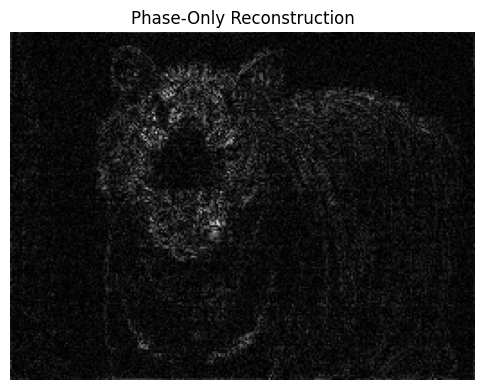

In [23]:
phase_only = fshift / (np.abs(fshift) + 1e-8)

img_phase_only = np.fft.ifft2(np.fft.ifftshift(phase_only))
img_phase_only = np.abs(img_phase_only)

plt.figure(figsize=(6,6))
plt.imshow(img_phase_only, cmap='gray')
plt.title("Phase-Only Reconstruction")
plt.axis('off')
plt.show()

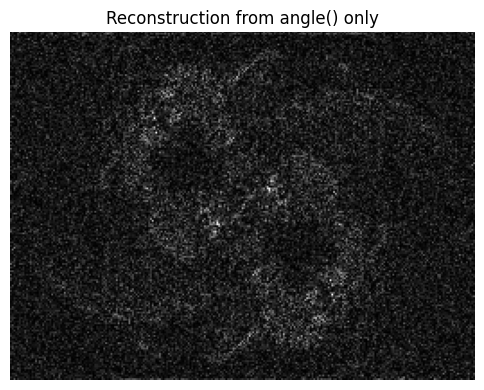

In [24]:
angle_only = np.angle(fshift)

try:
    img_angle = np.fft.ifft2(angle_only)
    img_angle = np.abs(img_angle)

    plt.figure(figsize=(6,6))
    plt.imshow(img_angle, cmap='gray')
    plt.title("Reconstruction from angle() only")
    plt.axis("off")
    plt.show()

except Exception as e:
    print("ERROR:", e)

#phase_only = fshift / |fshift|
#This keeps ONLY the phase and makes all magnitudes = 1.
#Structure of the image is preserved (edges, shapes).
#Intensities are distorted because magnitude was removed.
#difference from: np.angle(fshift)
#np.angle(fshift) returns ONLY the angle values (in radians),
#which is NOT a complex spectrum. It cannot be inverse-FFT'd
#directly because FFT requires magnitude + phase as complex numbers.

#np.angle(fshift) → just a 2D array of phase angles (real numbers).
#But inverse FFT needs COMPLEX frequency coefficients (Re + jIm).
#Angle-only gives NO magnitude information AND is not complex.
#Hence the reconstruction is meaningless – the output looks like noise.

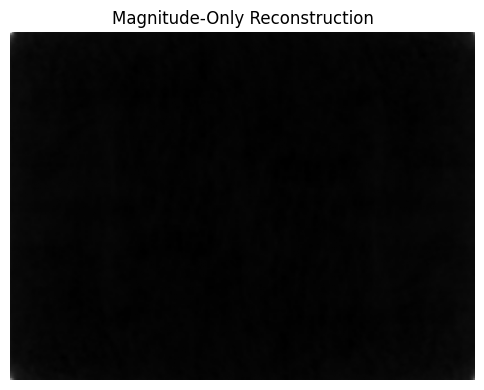

In [25]:
mag_only = np.abs(fshift)
mag_only = np.abs(fshift)

img_mag_only = np.fft.ifft2(np.fft.ifftshift(mag_only))
img_mag_only = np.abs(img_mag_only)

plt.figure(figsize=(6,6))
plt.imshow(img_mag_only, cmap='gray')
plt.title("Magnitude-Only Reconstruction")
plt.axis('off')
plt.show()

#Magnitude-only FFT has NO phase, so the structure of the image is LOST.
#The result looks like a blurry, symmetric cloud.
#Earlier, for visualization we used:magnitude_spectrum = log(|fshift|)
#Logarithm compresses large values and expands small values,
#making structures visible.
#Now we used |fshift| WITHOUT log for reconstruction.
#Hence magnitudes near the center dominate, image becomes just a smooth blob, looks nothing like the log-magnitude image


## Bonus - Part E

Load another image as you did before. Then swap magnitude and phase between them. In other words, for both images, find the magnitudes and phases. Combine magnitude of image 1 with phase of image 2. Also combine magnitude of 2 with phase of 1. Then reconstruct and display the resultant images.

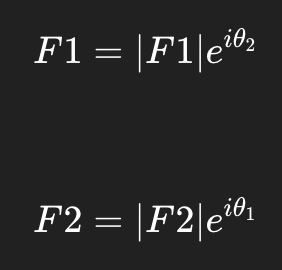

Do you notice how phase describes structure and magnitude describes texture of image ? Mention at last in code comments.


In [26]:
from google.colab import files
uploaded = files.upload()

Saving download1.png to download1.png


(np.float64(-0.5), np.float64(258.5), np.float64(193.5), np.float64(-0.5))

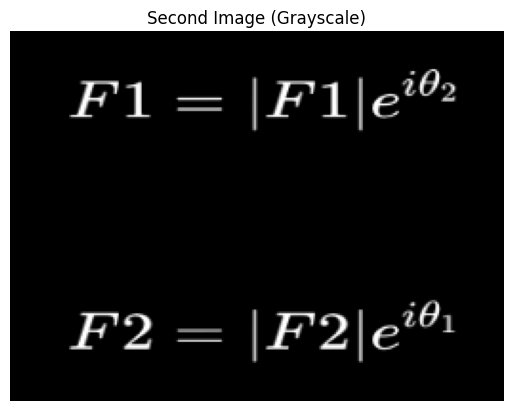

In [33]:
img2_bgr = cv2.imread(list(uploaded.keys())[0])
img2_rgb = cv2.cvtColor(img2_bgr, cv2.COLOR_BGR2RGB)

rows, cols = gray.shape

img2_rgb_resized = cv2.resize(img2_rgb, (cols, rows))

gray2 = cv2.cvtColor(img2_rgb_resized, cv2.COLOR_RGB2GRAY)

plt.imshow(gray2, cmap='gray')
plt.title("Second Image (Grayscale)")
plt.axis("off")

In [34]:

F1 = np.fft.fftshift(np.fft.fft2(gray))
mag1 = np.abs(F1)
phase1 = np.angle(F1)

F2 = np.fft.fftshift(np.fft.fft2(gray2))
mag2 = np.abs(F2)
phase2 = np.angle(F2)

In [35]:
F1_swapped = mag1 * np.exp(1j * phase2)

F2_swapped = mag2 * np.exp(1j * phase1)

In [36]:
img1_rec = np.fft.ifft2(np.fft.ifftshift(F1_swapped))
img1_rec = np.abs(img1_rec)

img2_rec = np.fft.ifft2(np.fft.ifftshift(F2_swapped))
img2_rec = np.abs(img2_rec)

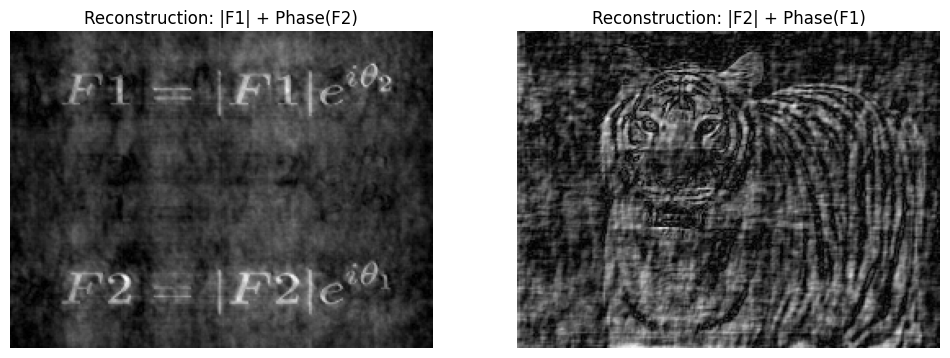

In [37]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(img1_rec, cmap='gray')
plt.title("Reconstruction: |F1| + Phase(F2)")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img2_rec, cmap='gray')
plt.title("Reconstruction: |F2| + Phase(F1)")
plt.axis("off")

plt.show()

In [38]:
"""
When combining |F1| with Phase(F2), the resulting image looks mostly like image 2.
When combining |F2| with Phase(F1), the resulting image looks mostly like image 1.

Phase contains the STRUCTURE, SHAPES, and EDGES of the image.
Magnitude contains the TEXTURE, brightness, and contrast information.

Therefore:
Phase dominates visual identity of the image.
Magnitude only adds textural/contrast details.

This demonstrates that PHASE is far more important than magnitude
for reconstructing recognizable structures in images.
"""

'\nOBSERVATION:\n------------\nWhen combining |F1| with Phase(F2), the resulting image looks mostly like image 2.\nWhen combining |F2| with Phase(F1), the resulting image looks mostly like image 1.\n\nWHY?\n----\nPhase contains the STRUCTURE, SHAPES, and EDGES of the image.\nMagnitude contains the TEXTURE, brightness, and contrast information.\n\nTherefore:\n• Phase dominates visual identity of the image.\n• Magnitude only adds textural/contrast details.\n\nThis demonstrates that PHASE is far more important than magnitude\nfor reconstructing recognizable structures in images.\n'